# Invesitgation on sleep disorders

This project will use synthesis dataset from kaggle and investigate using traditional machine learning and data visulisation the cause of sleep disorders.


## Importing the data from kaggle

We will import the dataset directly onto our device and print the path of where it is installed.

In [2]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("siamaktahmasbi/insights-into-sleep-patterns-and-daily-habits")

print("Path to dataset files:", path)

You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


100%|█████████████████████████████████████████████████████████████████████████████| 8.47k/8.47k [00:00<00:00, 2.18MB/s]

Extracting model files...
Path to dataset files: C:\Users\benda\.cache\kagglehub\datasets\siamaktahmasbi\insights-into-sleep-patterns-and-daily-habits\versions\1


Then we will visulise the head of the dataset using pandas,

In [5]:
!pip install pandas



You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import os

df = pd.read_csv(path+"/sleep_health_lifestyle_dataset.csv")

print(df.head())

   Person ID  Gender  Age     Occupation  Sleep Duration (hours)  \
0          1    Male   29   Manual Labor                     7.4   
1          2  Female   43        Retired                     4.2   
2          3    Male   44        Retired                     6.1   
3          4    Male   29  Office Worker                     8.3   
4          5    Male   67        Retired                     9.1   

   Quality of Sleep (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                             7.0                                     41   
1                             4.9                                     41   
2                             6.0                                    107   
3                            10.0                                     20   
4                             9.5                                     19   

   Stress Level (scale: 1-10) BMI Category  \
0                           7        Obese   
1                           5        Obese

We then are going to visualise the different points to see the spread of the values

In [9]:
!pip install matplotlib
%matplotlib inline # keeps it within the notebook

You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.
UsageError: unrecognized arguments: # keeps it within the notebook


In [11]:
from matplotlib import pyplot as plt


Bad key text.latex.preview in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

Counter({'Student': 110, 'Office Worker': 99, 'Manual Labor': 96, 'Retired': 95})


Text(0, 0.5, 'BMI Category')

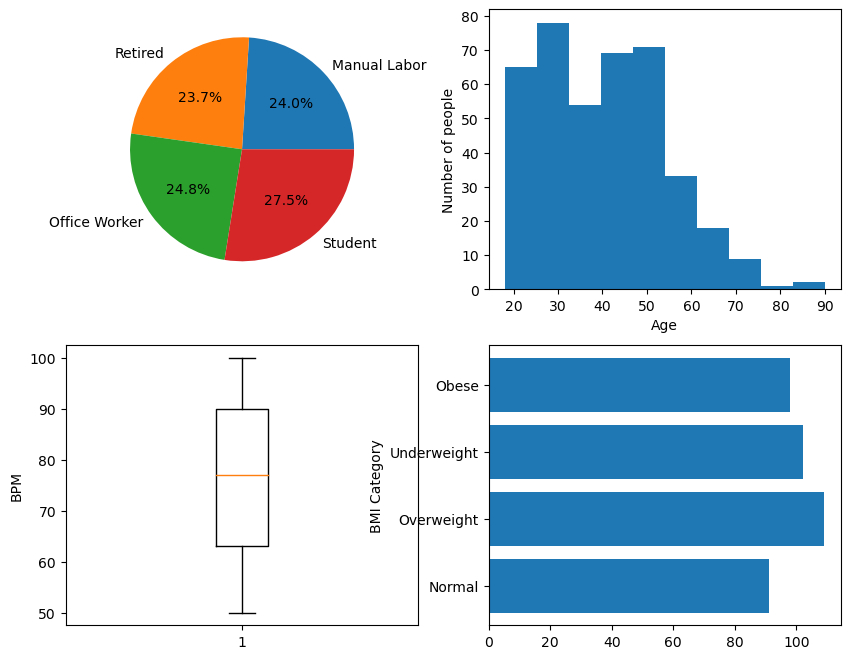

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
import numpy as np

data = Counter(df["Occupation"]) 

y =Counter(data)
print(y)
labels = y.keys()
sizes = y.values()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0, 0].pie(sizes, labels=labels,autopct='%1.1f%%')

data = df["Age"]
axes[0,1].hist(data)
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Number of people")

data = df["Heart Rate (bpm)"]
axes[1,0].boxplot(data)
axes[1,0].set_ylabel("BPM")

data = df["BMI Category"]
y =Counter(data)
y_pos = np.arange(len(y.keys()))
axes[1,1].barh(y_pos, y.values(), align='center')
axes[1,1].set_yticks(y_pos, labels=y.keys())
axes[1,1].invert_yaxis()  # labels read top-to-bottom
axes[1,1].set_xlabel('Number of people')
axes[1,1].set_xlabel('Number of people')